In [12]:
cd /Users/eisukeokuda/Research-Project/

/Users/eisukeokuda/Research-Project


In [13]:
import os
import csv
import yaml

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm

import json

from src.utils import (
    preprocess_contigs,
    label_to_id,
)

In [14]:
contig_path = "data/metahit/contigs.fna.gz"
taxonomy_path = "data/metahit/taxonomy.tsv"
contig_processed_path = "data/species_labelled_contigs.csv"
model_configs = "config/models.yml"

results_main_path = "results/main_results"
results_thresh_path = "results/threshold_similarities"

# Read Model Configs
with open(model_configs, "r") as model_file:
    models_config = yaml.safe_load(model_file)

# Read DNA Sequences
preprocess_contigs(contig_path, contig_processed_path)

# Read Processed DNA Sequences
with open(contig_processed_path) as csvfile:
    data = list(csv.reader(csvfile, delimiter=","))
dna_sequences = [i[1] for i in data[1:]]
label_ids, id2label = label_to_id(data)

CSV file already exists at data/species_labelled_contigs.csv


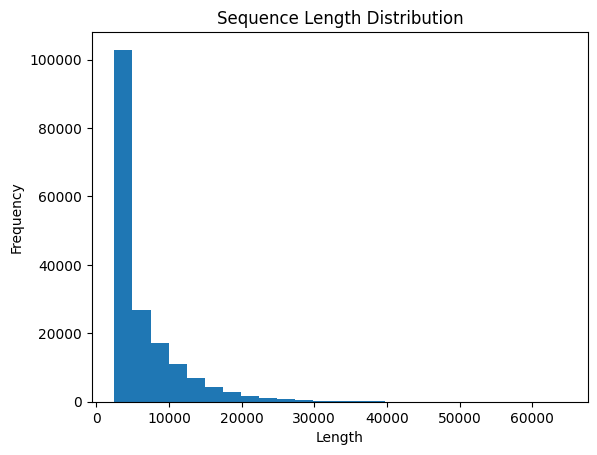

In [25]:
# calculate each sequence length
sequence_len = [len(s) for s in dna_sequences]

plt.hist(sequence_len, bins=25, range=(2500, 64554))

# Add a title and labels as needed
plt.title('Sequence Length Distribution')
plt.xlabel('Length')
plt.ylabel('Frequency')

# Save the figure as an SVG file
plt.savefig('figures/seq_len_hist.svg')

# Display the plot
plt.show()

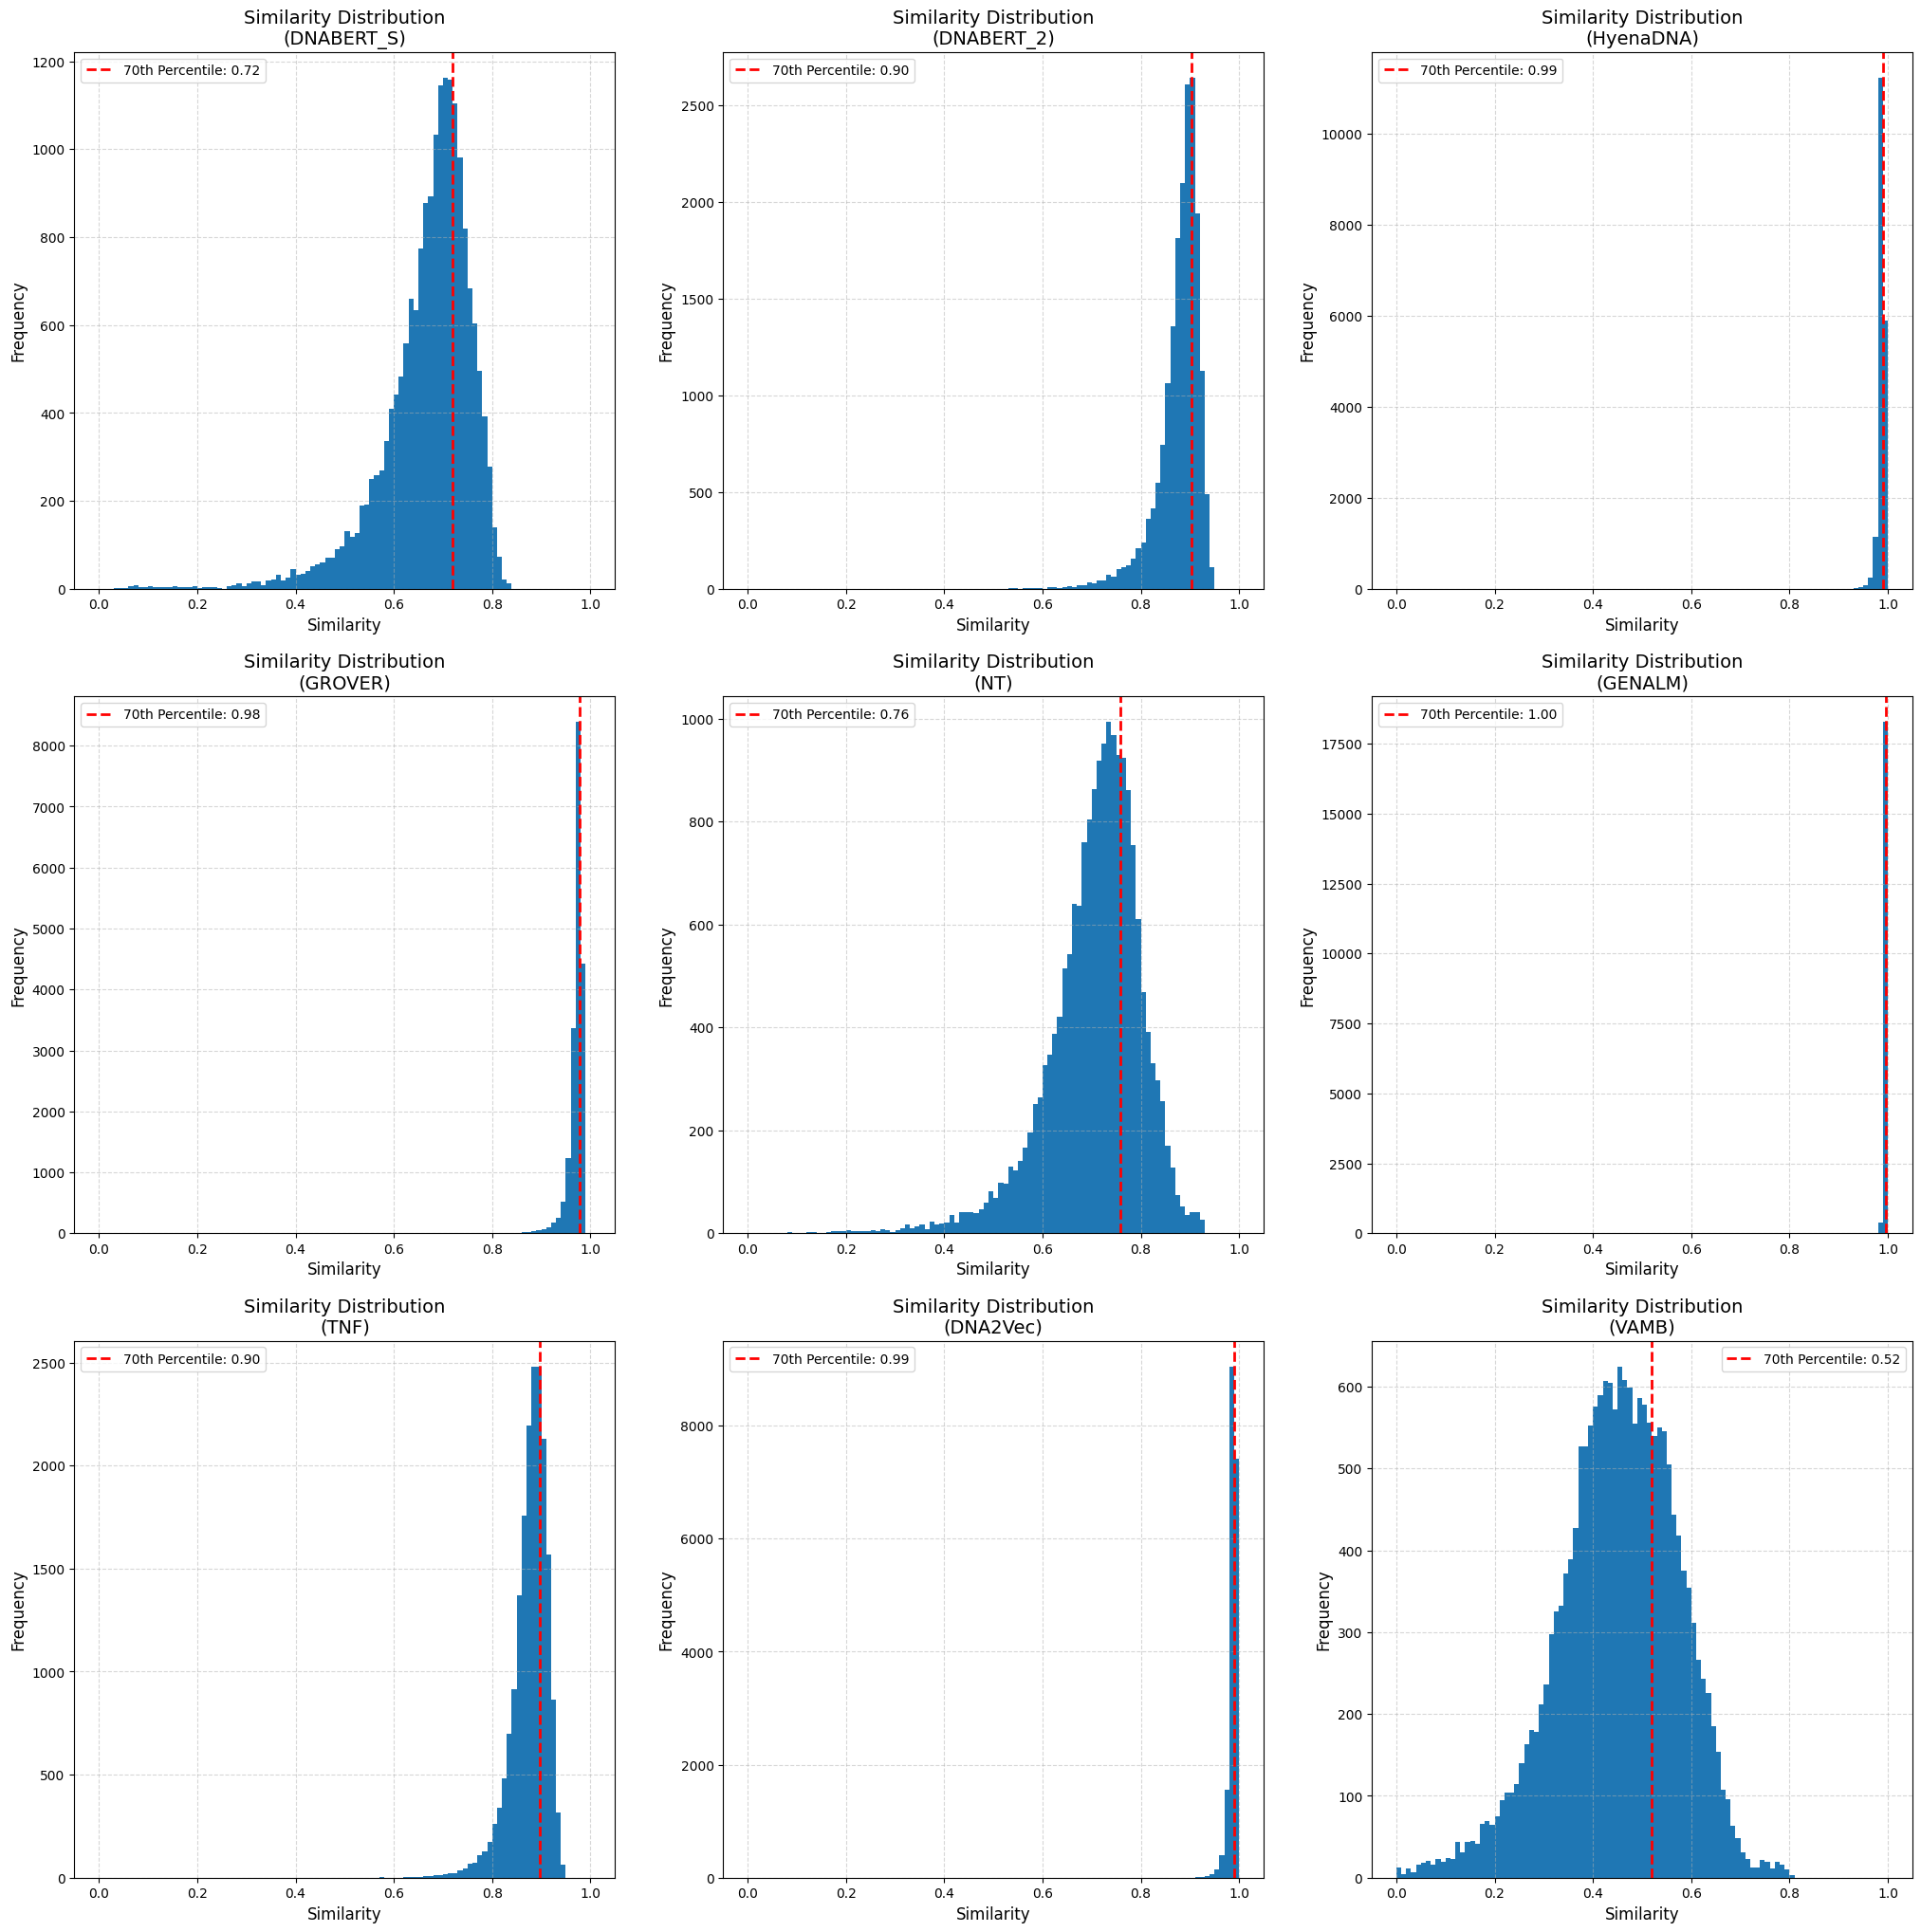

In [7]:
# Create a 3*3 subplot
fig, axes = plt.subplots(3, 3, figsize=(25, 25))  
axes = axes.flatten()

for i, model_name in enumerate(models_config.keys()):
    results_threshold_similarities_file = os.path.join(
        results_thresh_path,
        model_name + "_70.npy",
    )
    # Load threshold similarities
    thresh_sim = np.load(results_threshold_similarities_file)

    # Plot a histgram and set labels
    axes[i].hist(thresh_sim, bins=100, range=(0, 1))
    axes[i].set_title(f"Similarity Distribution\n({model_name})", fontsize=14)
    axes[i].set_xlabel('Similarity', fontsize=12)
    axes[i].set_ylabel('Frequency', fontsize=12)
    axes[i].grid(True, linestyle='--', alpha=0.5)
    
    # Add the 70th percentile vertical line
    percentile_70 = np.percentile(thresh_sim, 70)
    axes[i].axvline(percentile_70, color='red', linestyle='dashed', linewidth=2, label=f'70th Percentile: {percentile_70:.2f}')
    axes[i].legend()


# Save the figure as an SVG file
plt.savefig('figures/sim_hist_3x3.svg')

plt.show()
    

/var/folders/tj/hl1lt9gs7437b5wxt0r22tfc0000gn/T/ipykernel_49530/1690452068.py:2: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('viridis').reversed()


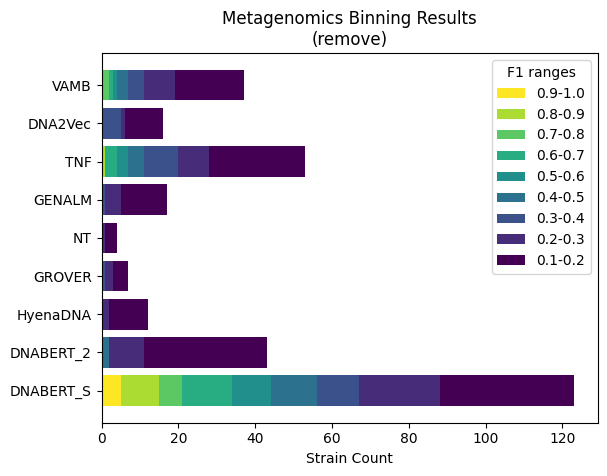

f1 count (remove): 
0.1-0.2: [35, 32, 10, 4, 3, 12, 25, 10, 18], 
0.2-0.3: [21, 9, 2, 2, 1, 4, 8, 1, 8], 
0.3-0.4: [11, 0, 0, 1, 0, 1, 9, 5, 4], 
0.4-0.5: [12, 2, 0, 0, 0, 0, 4, 0, 3],
0.5-0.6: [10, 0, 0, 0, 0, 0, 3, 0, 1], 
0.6-0.7: [13, 0, 0, 0, 0, 0, 3, 0, 1],  
0.7-0.8: [6, 0, 0, 0, 0, 0, 0, 0, 2],
0.8-0.9: [10, 0, 0, 0, 0, 0, 1, 0, 0], 
0.9-1.0: [5, 0, 0, 0, 0, 0, 0, 0, 0], 
0.1-1.0: [123, 43, 12, 7, 4, 17, 53, 16, 37]


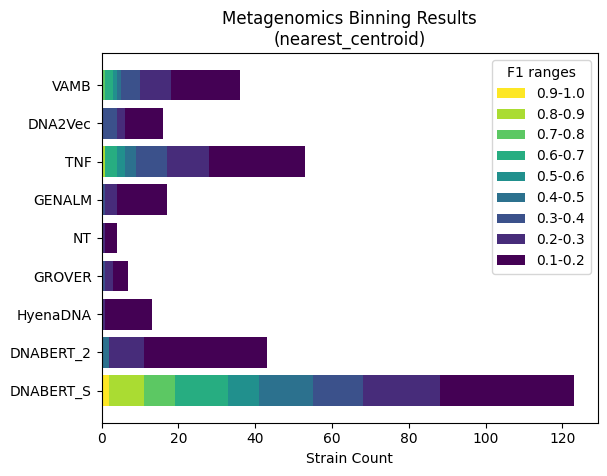

f1 count (nearest_centroid): 
0.1-0.2: [35, 32, 12, 4, 3, 13, 25, 10, 18], 
0.2-0.3: [20, 9, 1, 2, 1, 3, 11, 2, 8], 
0.3-0.4: [13, 0, 0, 1, 0, 1, 8, 4, 5], 
0.4-0.5: [14, 2, 0, 0, 0, 0, 3, 0, 1],
0.5-0.6: [8, 0, 0, 0, 0, 0, 2, 0, 1], 
0.6-0.7: [14, 0, 0, 0, 0, 0, 3, 0, 2],  
0.7-0.8: [8, 0, 0, 0, 0, 0, 0, 0, 1],
0.8-0.9: [9, 0, 0, 0, 0, 0, 1, 0, 0], 
0.9-1.0: [2, 0, 0, 0, 0, 0, 0, 0, 0], 
0.1-1.0: [123, 43, 13, 7, 4, 17, 53, 16, 36]


In [16]:
# Create a colormap
cmap = cm.get_cmap('viridis').reversed()
colors = cmap(np.linspace(0, 1, 9)) 

for type in ['remove', 'nearest_centroid']:
    f1_01 = []
    f1_02 = []
    f1_03 = []
    f1_04 = []
    f1_05 = []
    f1_06 = []
    f1_07 = []
    f1_08 = []
    f1_09 = []

    for model_name in models_config.keys():
        # Load the f1 results
        results_path = os.path.join(results_main_path, f'{model_name}_{type}.json')
        with open(results_path) as f:
            results_dict = json.load(f)
        
        f1_01.append(results_dict[model_name]['f1_results'][0]-results_dict[model_name]['f1_results'][1])
        f1_02.append(results_dict[model_name]['f1_results'][1]-results_dict[model_name]['f1_results'][2])
        f1_03.append(results_dict[model_name]['f1_results'][2]-results_dict[model_name]['f1_results'][3])
        f1_04.append(results_dict[model_name]['f1_results'][3]-results_dict[model_name]['f1_results'][4])
        f1_05.append(results_dict[model_name]['f1_results'][4]-results_dict[model_name]['f1_results'][5])
        f1_06.append(results_dict[model_name]['f1_results'][5]-results_dict[model_name]['f1_results'][6])
        f1_07.append(results_dict[model_name]['f1_results'][6]-results_dict[model_name]['f1_results'][7])
        f1_08.append(results_dict[model_name]['f1_results'][7]-results_dict[model_name]['f1_results'][8])
        f1_09.append(results_dict[model_name]['f1_results'][8])

    f1_total = [sum(x) for x in zip(f1_01, f1_02, f1_03, f1_04, f1_05, f1_06, f1_07, f1_08, f1_09)]
    
    x_positions = np.arange(len(models_config.keys()))

    # plot a stacked bar graph
    plt.barh(x_positions, f1_09, color=colors[0], label='0.9-1.0')
    plt.barh(x_positions, f1_08, left=f1_09, color=colors[1], label='0.8-0.9')
    plt.barh(x_positions, f1_07, left=np.add(f1_09, f1_08), color=colors[2], label='0.7-0.8')
    plt.barh(x_positions, f1_06, left=np.add(np.add(f1_09, f1_08), f1_07), color=colors[3], label='0.6-0.7')
    plt.barh(x_positions, f1_05, left=np.add(np.add(np.add(f1_09, f1_08), f1_07), f1_06), color=colors[4], label='0.5-0.6')
    plt.barh(x_positions, f1_04, left=np.add(np.add(np.add(np.add(f1_09, f1_08), f1_07), f1_06), f1_05), color=colors[5], label='0.4-0.5')
    plt.barh(x_positions, f1_03, left=np.add(np.add(np.add(np.add(np.add(f1_09, f1_08), f1_07), f1_06), f1_05), f1_04), color=colors[6], label='0.3-0.4')
    plt.barh(x_positions, f1_02, left=np.add(np.add(np.add(np.add(np.add(np.add(f1_09, f1_08), f1_07), f1_06), f1_05), f1_04), f1_03), color=colors[7], label='0.2-0.3')
    plt.barh(x_positions, f1_01, left=np.add(np.add(np.add(np.add(np.add(np.add(np.add(f1_09, f1_08), f1_07), f1_06), f1_05), f1_04), f1_03), f1_02), color=colors[8], label='0.1-0.2')

    # add the labels and titile
    plt.yticks(x_positions, models_config.keys())
    plt.xlabel('Strain Count')
    plt.title(f'Metagenomics Binning Results\n({type})')
    plt.legend(title='F1 ranges')

    # Save the figure as an SVG file
    plt.savefig(f'figures/f1_{type}_01.svg', bbox_inches='tight')
    
    plt.show()
    plt.close()

    print(f'f1 count ({type}): \n0.1-0.2: {f1_01}, \n0.2-0.3: {f1_02}, \n0.3-0.4: {f1_03}, \n0.4-0.5: {f1_04},\n0.5-0.6: {f1_05}, \n0.6-0.7: {f1_06},  \n0.7-0.8: {f1_07},\n0.8-0.9: {f1_08}, \n0.9-1.0: {f1_09}, \n0.1-1.0: {f1_total}')